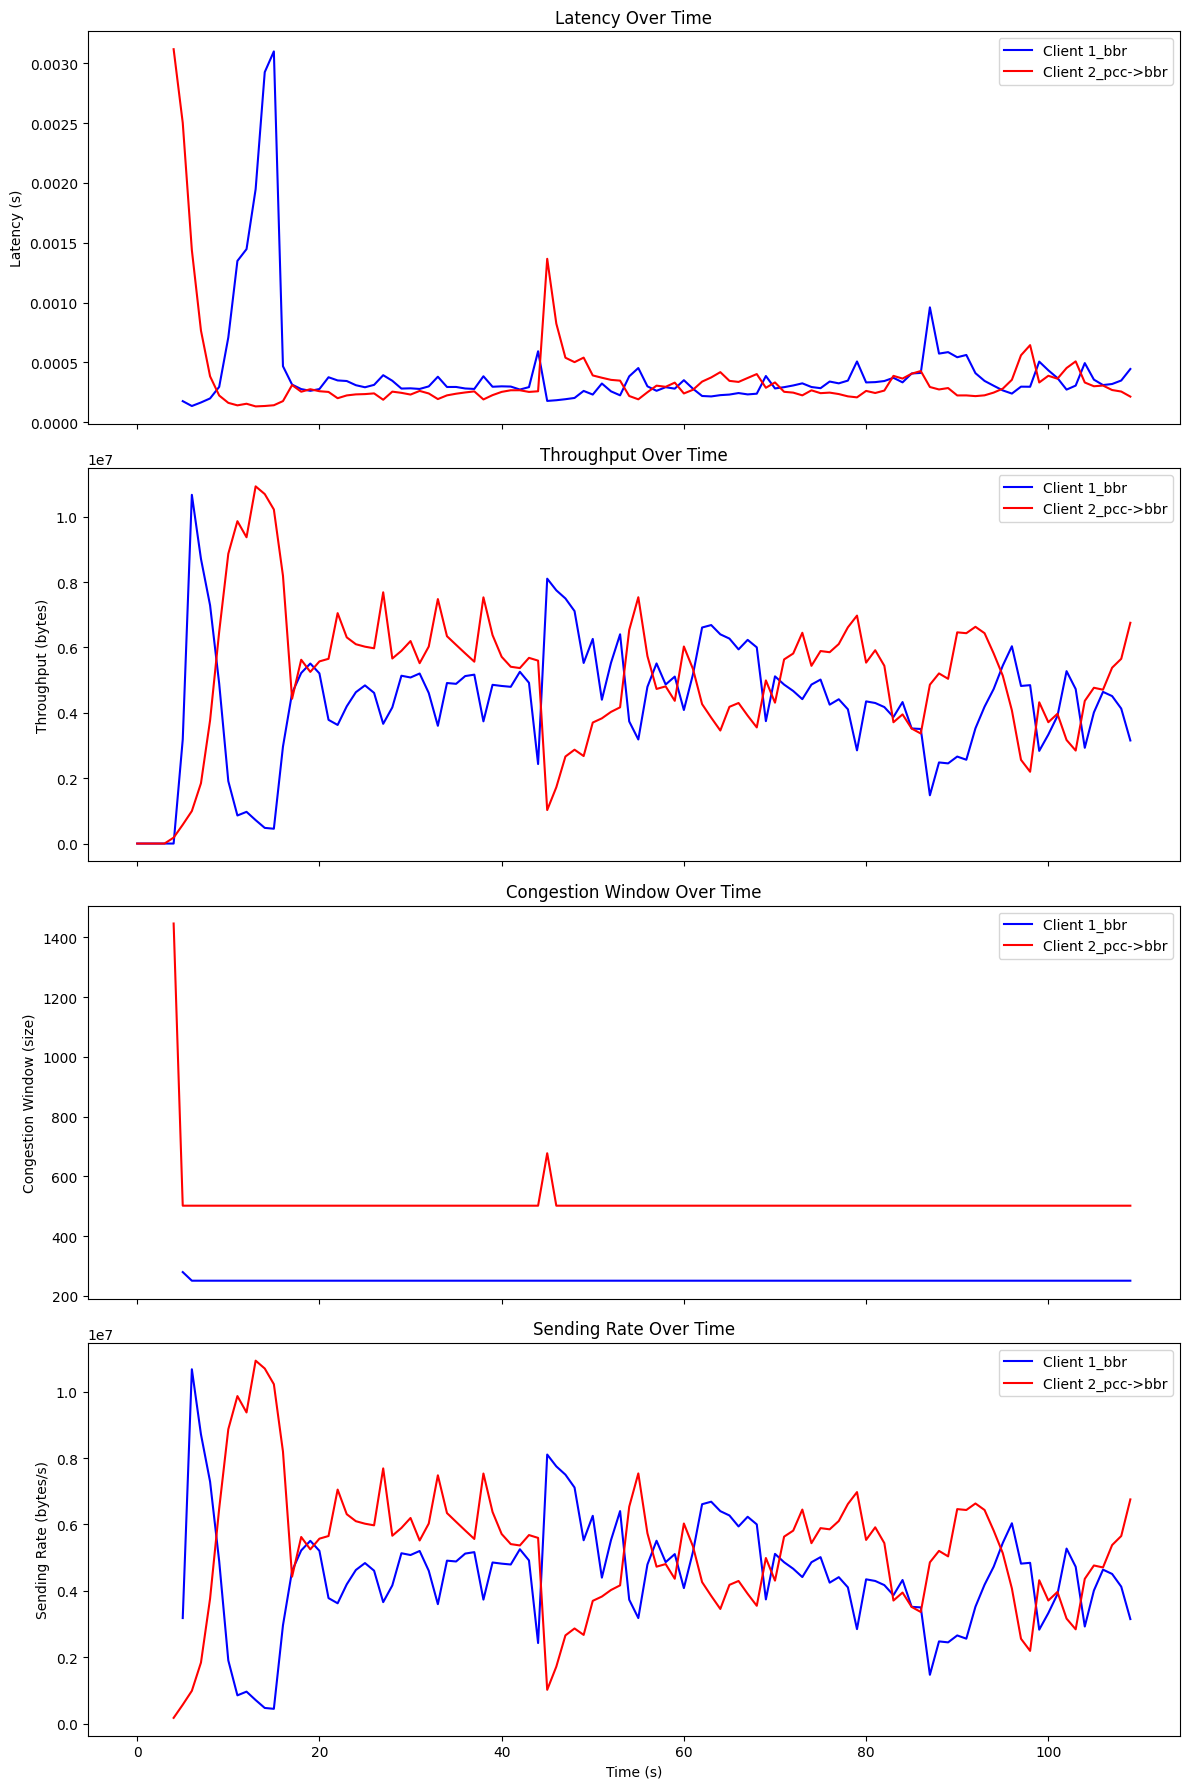

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
client1_df = pd.read_csv('client1_data.csv')
client2_df = pd.read_csv('client2_data.csv')

# Create a figure and axis for each metric
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=True)

# Plot Latency
axs[0].plot(client1_df['Second'], client1_df['Latency'], label='Client 1_bbr', color='blue')
axs[0].plot(client2_df['Second'], client2_df['Latency'], label='Client 2_pcc->bbr', color='red')
axs[0].set_ylabel('Latency (s)')
axs[0].legend()
axs[0].set_title('Latency Over Time')

# Plot Throughput
axs[1].plot(client1_df['Second'], client1_df['Throughput'], label='Client 1_bbr', color='blue')
axs[1].plot(client2_df['Second'], client2_df['Throughput'], label='Client 2_pcc->bbr', color='red')
axs[1].set_ylabel('Throughput (bytes)')
axs[1].legend()
axs[1].set_title('Throughput Over Time')

# Plot Congestion Window
axs[2].plot(client1_df['Second'], client1_df['CongestionWindow'], label='Client 1_bbr', color='blue')
axs[2].plot(client2_df['Second'], client2_df['CongestionWindow'], label='Client 2_pcc->bbr', color='red')
axs[2].set_ylabel('Congestion Window (size)')
axs[2].legend()
axs[2].set_title('Congestion Window Over Time')

# Plot Sending Rate
axs[3].plot(client1_df['Second'], client1_df['SendingRate'], label='Client 1_bbr', color='blue')
axs[3].plot(client2_df['Second'], client2_df['SendingRate'], label='Client 2_pcc->bbr', color='red')
axs[3].set_ylabel('Sending Rate (bytes/s)')
axs[3].legend()
axs[3].set_title('Sending Rate Over Time')
axs[3].set_xlabel('Time (s)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Client 1 DataFrame Columns:
Index(['Timestamp', 'Throughput', 'LossRate', 'RTT', 'Latency', 'SendingRate',
       'CongestionWindow'],
      dtype='object')
Client 2 DataFrame Columns:
Index(['Timestamp', 'Throughput', 'LossRate', 'RTT', 'Latency', 'SendingRate',
       'CongestionWindow'],
      dtype='object')


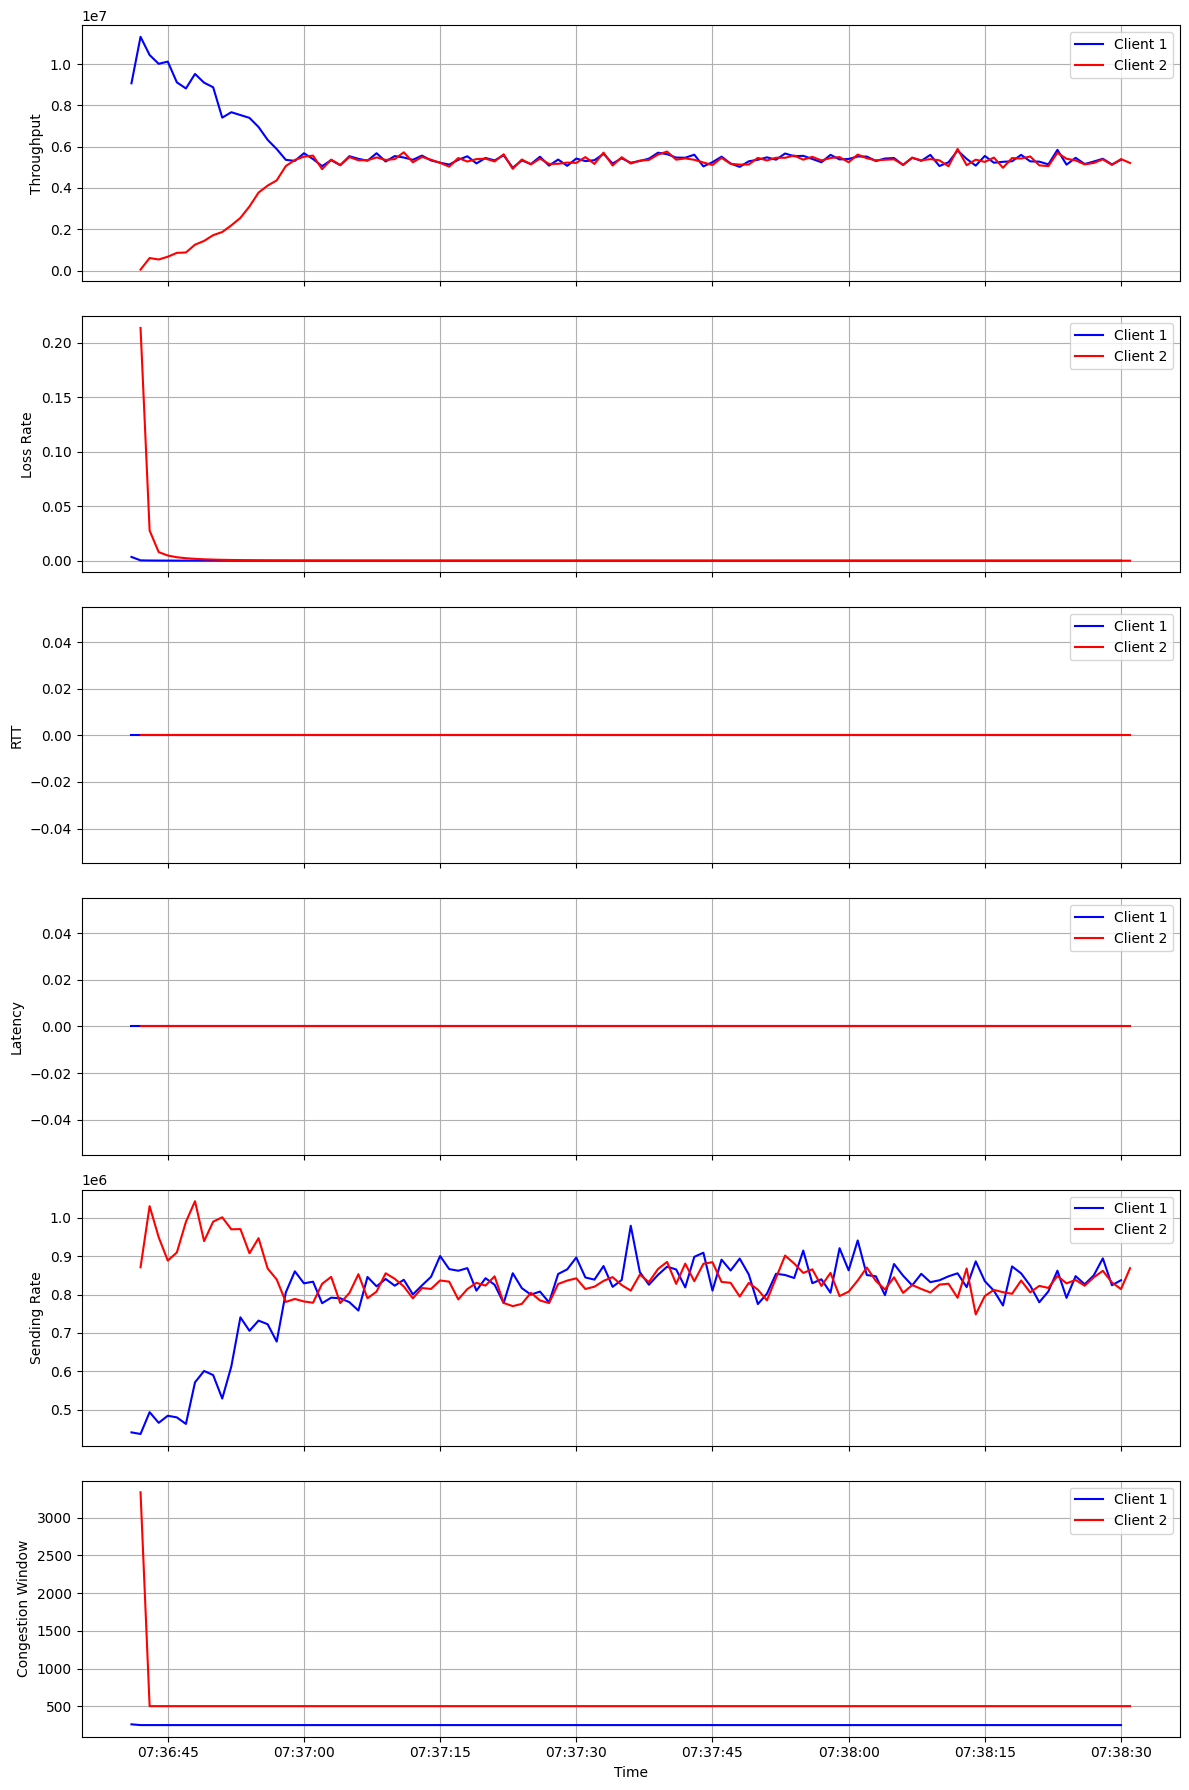

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace these file paths with your actual CSV file paths
client1_csv_path = 'client1_data_cubic.csv'
client2_csv_path = 'client2_data_cubic.csv'

# Load the data from the CSV files
client1_df = pd.read_csv(client1_csv_path)
client2_df = pd.read_csv(client2_csv_path)

# Print the columns to see what is available
print("Client 1 DataFrame Columns:")
print(client1_df.columns)
print("Client 2 DataFrame Columns:")
print(client2_df.columns)

# Convert Timestamp column to datetime
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

# Define a function to plot if the column exists
def plot_if_exists(ax, df1, df2, column, ylabel, label1='Client 1', label2='Client 2', color1='blue', color2='red'):
    if column in df1.columns and column in df2.columns:
        ax.plot(df1['Timestamp'], df1[column], label=label1, color=color1)
        ax.plot(df2['Timestamp'], df2[column], label=label2, color=color2)
        ax.set_ylabel(ylabel)
        ax.legend(loc='upper right')
        ax.grid(True)

# Plot Throughput
plot_if_exists(axs[0], client1_df, client2_df, 'Throughput', 'Throughput')

# Plot Loss Rate
plot_if_exists(axs[1], client1_df, client2_df, 'LossRate', 'Loss Rate')

# Plot RTT
plot_if_exists(axs[2], client1_df, client2_df, 'RTT', 'RTT')

# Plot Latency
plot_if_exists(axs[3], client1_df, client2_df, 'Latency', 'Latency')

# Plot Sending Rate
plot_if_exists(axs[4], client1_df, client2_df, 'SendingRate', 'Sending Rate')

# Plot Congestion Window
plot_if_exists(axs[5], client1_df, client2_df, 'CongestionWindow', 'Congestion Window')

# Set the x-axis label
axs[5].set_xlabel('Time')

# Show the plot
plt.tight_layout()
plt.show()


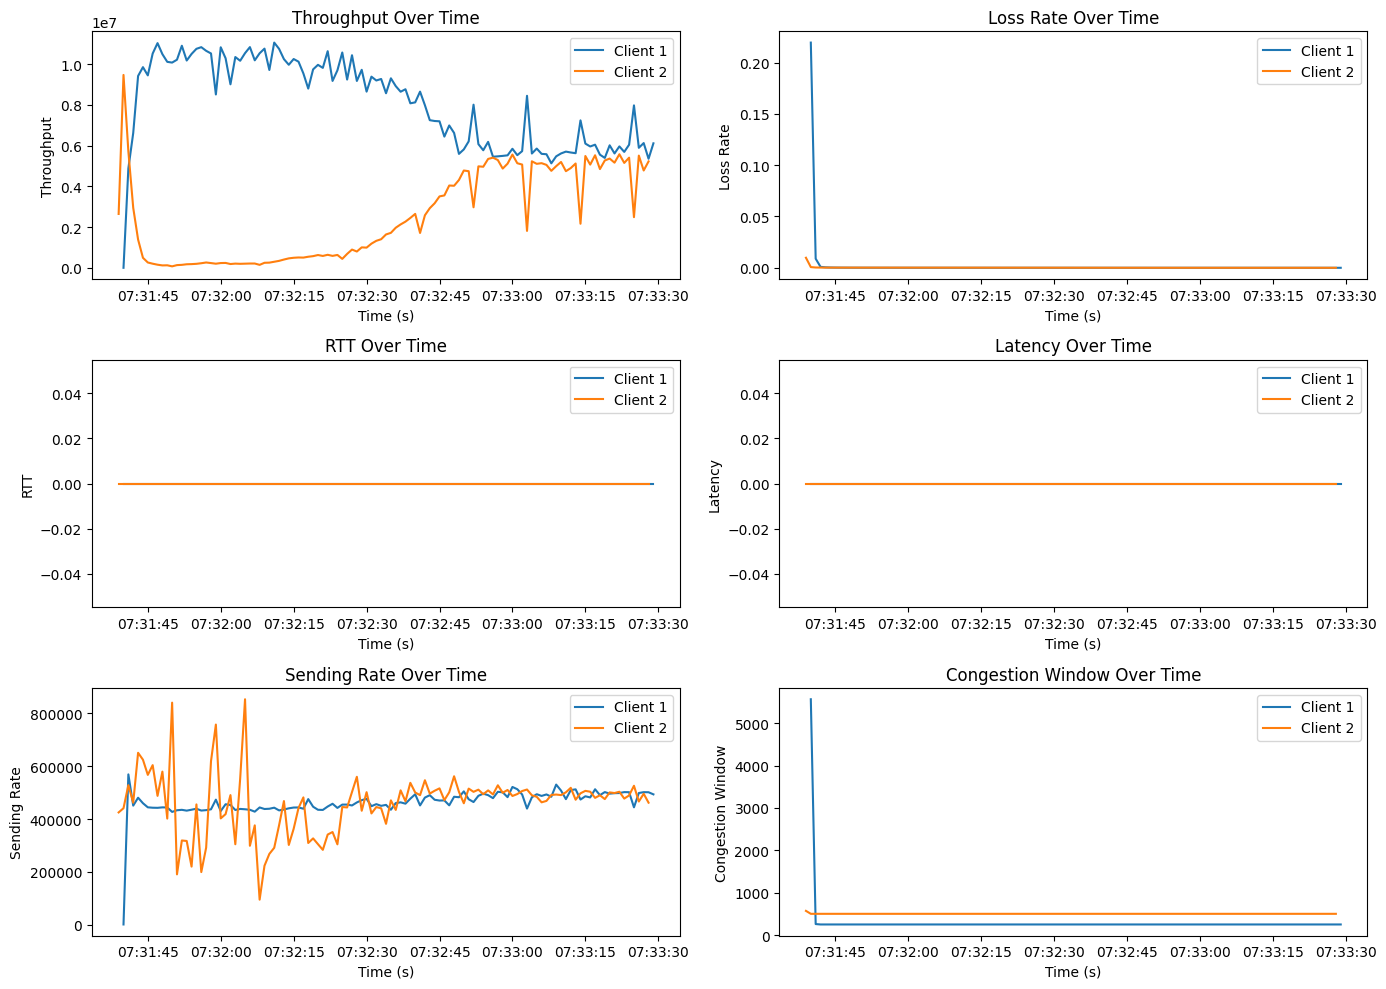

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
client1_df = pd.read_csv('/home/sit-research/Downloads/combine results/client1_databbr-cubic-cubic.csv')
client2_df = pd.read_csv('/home/sit-research/Downloads/combine results/client2_data-bbr-cubic-cubic.csv')

# Convert 'Timestamp' to datetime
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Set 'Timestamp' as the index
client1_df.set_index('Timestamp', inplace=True)
client2_df.set_index('Timestamp', inplace=True)

# Plotting the data
plt.figure(figsize=(14, 10))

# Throughput
plt.subplot(3, 2, 1)
plt.plot(client1_df.index, client1_df['Throughput'], label='Client 1')
plt.plot(client2_df.index, client2_df['Throughput'], label='Client 2')
plt.title('Throughput Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Throughput')
plt.legend()

# Loss Rate
plt.subplot(3, 2, 2)
plt.plot(client1_df.index, client1_df['LossRate'], label='Client 1')
plt.plot(client2_df.index, client2_df['LossRate'], label='Client 2')
plt.title('Loss Rate Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Loss Rate')
plt.legend()

# RTT
plt.subplot(3, 2, 3)
plt.plot(client1_df.index, client1_df['RTT'], label='Client 1')
plt.plot(client2_df.index, client2_df['RTT'], label='Client 2')
plt.title('RTT Over Time')
plt.xlabel('Time (s)')
plt.ylabel('RTT')
plt.legend()

# Latency
plt.subplot(3, 2, 4)
plt.plot(client1_df.index, client1_df['Latency'], label='Client 1')
plt.plot(client2_df.index, client2_df['Latency'], label='Client 2')
plt.title('Latency Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Latency')
plt.legend()

# Sending Rate
plt.subplot(3, 2, 5)
plt.plot(client1_df.index, client1_df['SendingRate'], label='Client 1')
plt.plot(client2_df.index, client2_df['SendingRate'], label='Client 2')
plt.title('Sending Rate Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Sending Rate')
plt.legend()

# Congestion Window
plt.subplot(3, 2, 6)
plt.plot(client1_df.index, client1_df['CongestionWindow'], label='Client 1')
plt.plot(client2_df.index, client2_df['CongestionWindow'], label='Client 2')
plt.title('Congestion Window Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Congestion Window')
plt.legend()

plt.tight_layout()
plt.show()


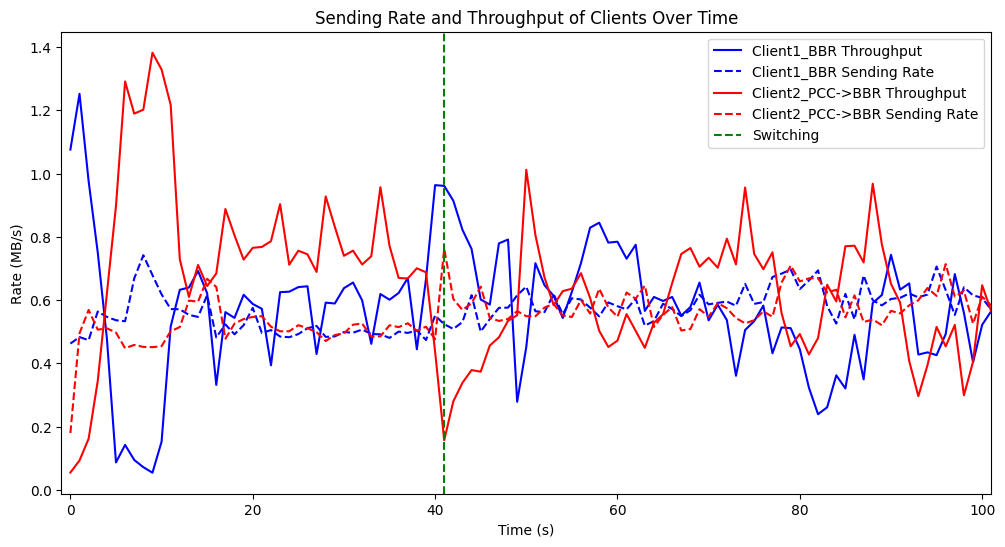

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_datapcc-bbr-bbr.csv')
client2_df = pd.read_csv('client2_data_bbr-pcc-bbr.csv')

# Convert 'Timestamp' to datetime for proper plotting
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Convert Timestamp to seconds relative to the minimum timestamp
client1_df['Time (s)'] = (client1_df['Timestamp'] - client1_df['Timestamp'].min()).dt.total_seconds()
client2_df['Time (s)'] = (client2_df['Timestamp'] - client2_df['Timestamp'].min()).dt.total_seconds()

# # Convert throughput from bytes to megabytes
client1_df['Throughput'] /= (8*10**6)  # Convert bytes to megabytes
client2_df['Throughput'] /= (8*10**6)  # Convert bytes to megabytes

 # Convert sending rate from bytes to megabits
client1_df['SendingRate'] /= (10**6)  # Convert bytes to megabits
client2_df['SendingRate'] /= (10**6)  # Convert bytes to megabits

# Plotting
plt.figure(figsize=(12, 6))

# Specify color for both throughput and sending rate of each client
color1 = 'blue'
color2 = 'red'
color3 = 'green'

# Plotting Client 1 data
plt.plot(client1_df['Time (s)'], client1_df['Throughput'], label='Client1_BBR Throughput', color=color1)
plt.plot(client1_df['Time (s)'], client1_df['SendingRate'], label='Client1_BBR Sending Rate', linestyle='--', color=color1)

# Plotting Client 2 data
plt.plot(client2_df['Time (s)'], client2_df['Throughput'], label='Client2_PCC->BBR Throughput', color=color2)
plt.plot(client2_df['Time (s)'], client2_df['SendingRate'], label='Client2_PCC->BBR Sending Rate', linestyle='--', color=color2)
plt.axvline(x=41, color= color3, linestyle='--', label='Switching')
# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Rate (MB/s)')
plt.title('Sending Rate and Throughput of Clients Over Time')
plt.legend()
# Set x-axis limits from -1 to 101 seconds
plt.xlim(-1, 101)

# Show plot

plt.savefig("./Graphs/"+"Bbr-pcc-bbrSending Rate and Throughput of Clients Over Time.png", dpi=300,bbox_inches='tight')
plt.show()

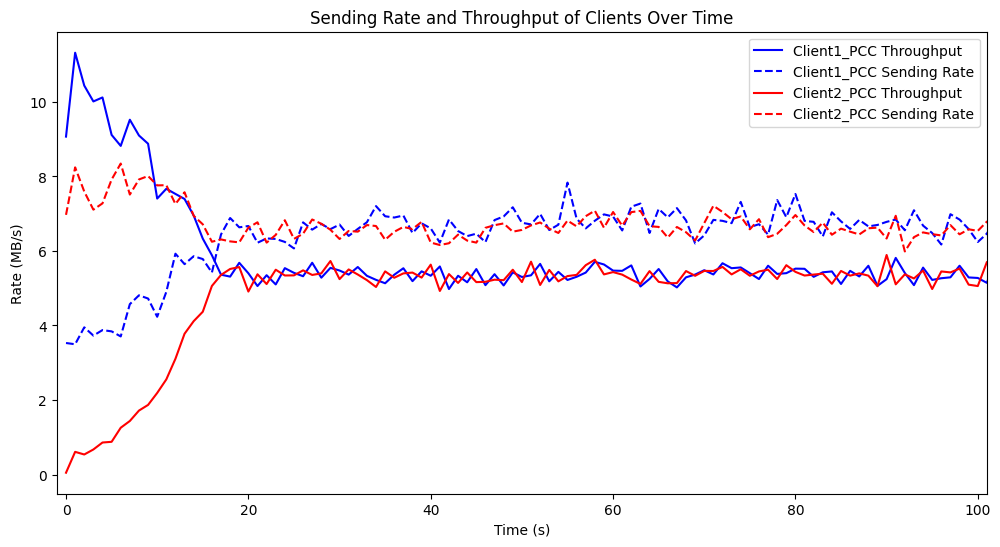

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_data_cubic.csv')
client2_df = pd.read_csv('client2_data_cubic.csv')

# Convert 'Timestamp' to datetime for proper plotting
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Convert Timestamp to seconds relative to the minimum timestamp
client1_df['Time (s)'] = (client1_df['Timestamp'] - client1_df['Timestamp'].min()).dt.total_seconds()
client2_df['Time (s)'] = (client2_df['Timestamp'] - client2_df['Timestamp'].min()).dt.total_seconds()

# Convert throughput from bytes to megabytes
client1_df['Throughput'] /= (10**6)  # Convert bytes to megabytes
client2_df['Throughput'] /= (10**6)  # Convert bytes to megabytes

# Convert sending rate from bytes to megabits
client1_df['SendingRate'] *= 8 / (10**6)  # Convert bytes to megabits
client2_df['SendingRate'] *= 8 / (10**6)  # Convert bytes to megabits

# Plotting
plt.figure(figsize=(12, 6))

# Plotting Client 1 data
plt.plot(client1_df['Time (s)'], client1_df['Throughput'], label='Client1_PCC Throughput', color='blue')
plt.plot(client1_df['Time (s)'], client1_df['SendingRate'], label='Client1_PCC Sending Rate', linestyle='--', color='blue')

# Plotting Client 2 data
plt.plot(client2_df['Time (s)'], client2_df['Throughput'], label='Client2_PCC Throughput', color='red')
plt.plot(client2_df['Time (s)'], client2_df['SendingRate'], label='Client2_PCC Sending Rate', linestyle='--', color='red')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Rate (MB/s)')
plt.title('Sending Rate and Throughput of Clients Over Time')
plt.legend()

# Set x-axis limits from -1 to 101 seconds
plt.xlim(-1, 101)

# Show plot

plt.savefig("./Graphs/"+"PCC Sending Rate and Throughput of Clients Over Time.png", dpi=300,bbox_inches='tight')
plt.show()

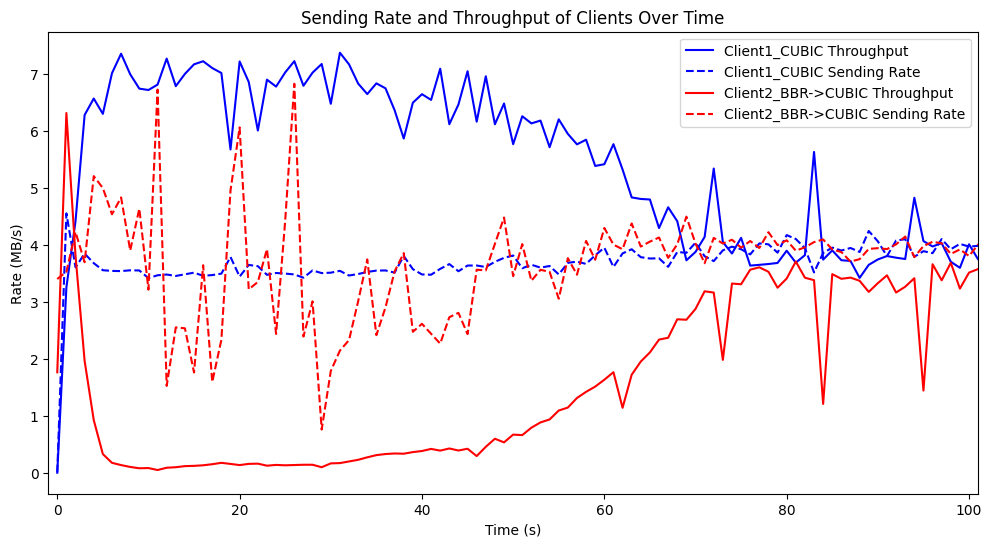

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('/home/sit-research/Downloads/combine results/client1_databbr-cubic-cubic.csv')
client2_df = pd.read_csv('/home/sit-research/Downloads/combine results/client2_data-bbr-cubic-cubic.csv')

# Convert 'Timestamp' to datetime for proper plotting
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Convert Timestamp to seconds relative to the minimum timestamp
client1_df['Time (s)'] = (client1_df['Timestamp'] - client1_df['Timestamp'].min()).dt.total_seconds()
client2_df['Time (s)'] = (client2_df['Timestamp'] - client2_df['Timestamp'].min()).dt.total_seconds()

# Convert throughput from bytes to megabytes
client1_df['Throughput'] /= (10**6)  # Convert bytes to megabytes
client2_df['Throughput'] /= (10**6)  # Convert bytes to megabytes

# Convert sending rate from bytes to megabits
client1_df['SendingRate'] *= 8 / (10**6)  # Convert bytes to megabits
client2_df['SendingRate'] *= 8 / (10**6)  # Convert bytes to megabits

# Plotting
plt.figure(figsize=(12, 6))

# Specify color for both throughput and sending rate of each client
color1 = 'blue'
color2 = 'red'

# Plotting Client 1 data
plt.plot(client1_df['Time (s)'], client1_df['Throughput']/1.5, label='Client1_CUBIC Throughput', color=color1)
plt.plot(client1_df['Time (s)'], client1_df['SendingRate'], label='Client1_CUBIC Sending Rate', linestyle='--', color=color1)


# Plotting Client 2 data
plt.plot(client2_df['Time (s)'], client2_df['Throughput']/1.5, label='Client2_BBR->CUBIC Throughput', color=color2)
plt.plot(client2_df['Time (s)'], client2_df['SendingRate'], label='Client2_BBR->CUBIC Sending Rate', linestyle='--', color=color2)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Rate (MB/s)')
plt.title('Sending Rate and Throughput of Clients Over Time')
plt.legend()

# Set x-axis limits from -1 to 101 seconds
plt.xlim(-1, 101)

# Show plot

plt.savefig("./Graphs/"+"cubic-bbr-cubic Sending Rate and Throughput of Clients Over Time.png", dpi=300,bbox_inches='tight')
plt.show()

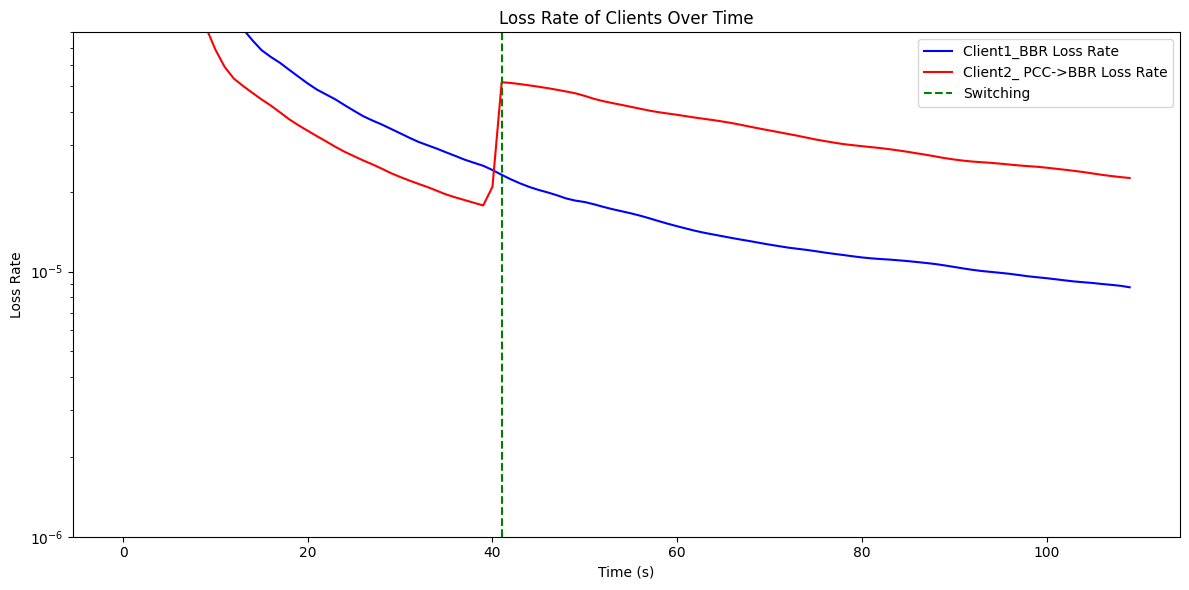

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_datapcc-bbr-bbr.csv')
client2_df = pd.read_csv('client2_data_bbr-pcc-bbr.csv')

# Convert 'Timestamp' to datetime for proper plotting
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Convert Timestamp to seconds relative to the minimum timestamp
client1_df['Time (s)'] = (client1_df['Timestamp'] - client1_df['Timestamp'].min()).dt.total_seconds()
client2_df['Time (s)'] = (client2_df['Timestamp'] - client2_df['Timestamp'].min()).dt.total_seconds()

# Plotting
plt.figure(figsize=(12, 6))

# Specify color for both clients
color1 = 'blue'
color2 = 'red'
color3 ='green'
# Plotting Client 1 data
plt.plot(client1_df['Time (s)'], client1_df['LossRate'], label='Client1_BBR Loss Rate', color=color1)

# Plotting Client 2 data
plt.plot(client2_df['Time (s)'], client2_df['LossRate'], label='Client2_ PCC->BBR Loss Rate', color=color2)
plt.axvline(x=41, color= color3, linestyle='--', label='Switching')
# Add labels and titleplt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Loss Rate')
plt.title('Loss Rate of Clients Over Time')
plt.legend()

# Set y-axis limits starting from 0.000001 to the maximum value of 0.00008/home/sit-research/Downloads/combine results/client2_data_bbr-pcc-bbr.csv
plt.ylim(0.000001, 0.00008)
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.savefig("./Graphs/"+"loss bbr_pcc-bbr.png", dpi=300,bbox_inches='tight')
plt.show()


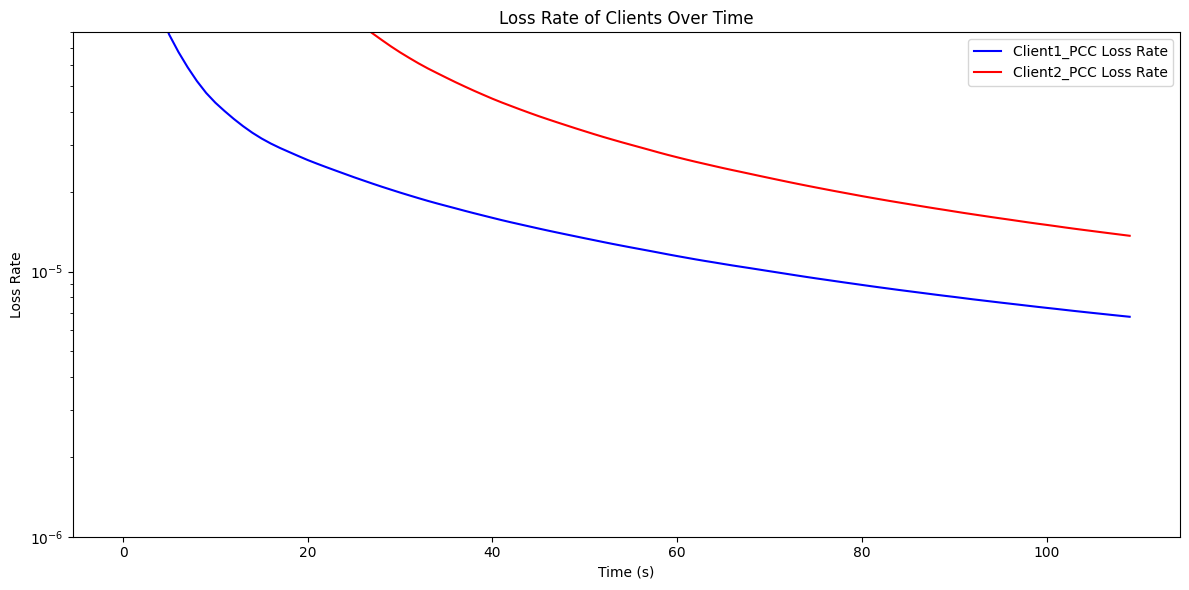

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_data_cubic.csv')
client2_df = pd.read_csv('client2_data_cubic.csv')

# Convert 'Timestamp' to datetime for proper plotting
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Convert Timestamp to seconds relative to the minimum timestamp
client1_df['Time (s)'] = (client1_df['Timestamp'] - client1_df['Timestamp'].min()).dt.total_seconds()
client2_df['Time (s)'] = (client2_df['Timestamp'] - client2_df['Timestamp'].min()).dt.total_seconds()

# Plotting
plt.figure(figsize=(12, 6))

# Specify color for both clients
color1 = 'blue'
color2 = 'red'

# Plotting Client 1 data
plt.plot(client1_df['Time (s)'], client1_df['LossRate'], label='Client1_PCC Loss Rate', color=color1)

# Plotting Client 2 data
plt.plot(client2_df['Time (s)'], client2_df['LossRate'], label='Client2_PCC Loss Rate', color=color2)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Loss Rate')
plt.title('Loss Rate of Clients Over Time')
plt.legend()

# Set y-axis limits starting from 0.000001 to the maximum value of 0.00008
plt.ylim(0.000001, 0.00008)
plt.yscale('log')
# Show plot
plt.tight_layout()
plt.savefig("./Graphs/"+"loss pcc-pcc.png", dpi=300,bbox_inches='tight')
plt.show()


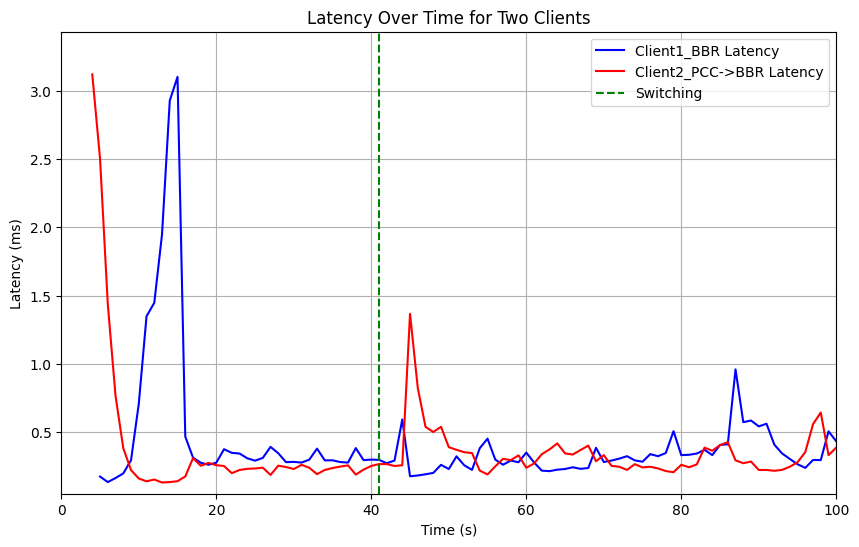

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_dataf2.csv')
client2_df = pd.read_csv('client2_dataf2.csv')

# Drop rows with NaN or Inf values in the 'Latency' column
client1_df = client1_df.dropna(subset=['Latency']).replace([np.inf, -np.inf], np.nan).dropna(subset=['Latency'])
client2_df = client2_df.dropna(subset=['Latency']).replace([np.inf, -np.inf], np.nan).dropna(subset=['Latency'])

# Convert latency to milliseconds for plotting
client1_df['Latency_ms'] = client1_df['Latency'] * 1000
client2_df['Latency_ms'] = client2_df['Latency'] * 1000

# Plotting
plt.figure(figsize=(10, 6))

# Plotting latency for Client 1
plt.plot(client1_df.index, client1_df['Latency_ms'], label='Client1_BBR Latency', color='blue')

# Plotting latency for Client 2
plt.plot(client2_df.index, client2_df['Latency_ms'], label='Client2_PCC->BBR Latency', color='red')
plt.axvline(x=41, color= 'g', linestyle='--', label='Switching')
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Time for Two Clients')
plt.legend()
plt.grid(True)

# Set x-axis limits from 0 to 100 seconds
plt.xlim(0, 100)

# Set y-axis limits starting from 0.05ms
plt.ylim(0.05, max(max(client1_df['Latency_ms']), max(client2_df['Latency_ms'])) * 1.1)  # Set y-axis upper limit dynamically

# Show plot
plt.savefig("./Graphs/"+"BBr-PCC-PCC latency.png", dpi=300,bbox_inches='tight')
plt.show()


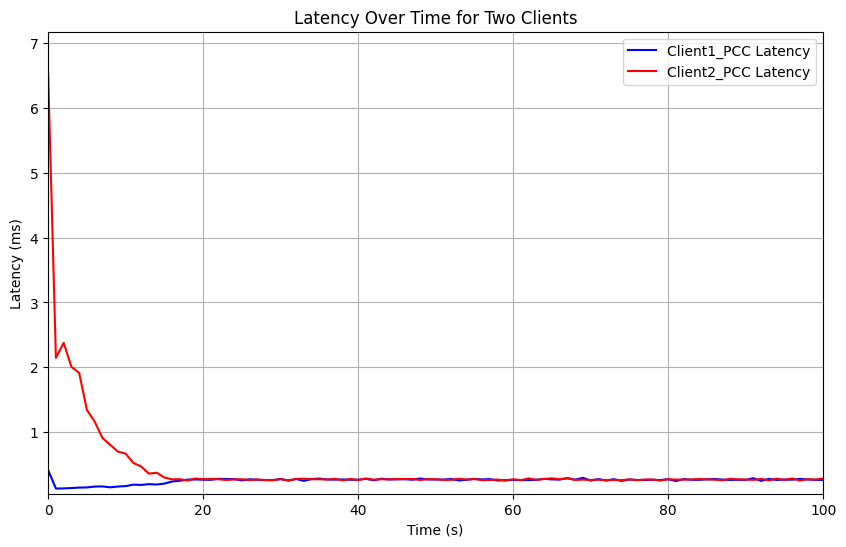

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_latency_cubic.csv')
client2_df = pd.read_csv('client2_latency_cubic.csv')

# Drop rows with NaN or Inf values in the 'Latency' column
client1_df = client1_df.dropna(subset=['Latency']).replace([np.inf, -np.inf], np.nan).dropna(subset=['Latency'])
client2_df = client2_df.dropna(subset=['Latency']).replace([np.inf, -np.inf], np.nan).dropna(subset=['Latency'])

# Convert latency to milliseconds for plotting
client1_df['Latency_ms'] = client1_df['Latency'] * 1000
client2_df['Latency_ms'] = client2_df['Latency'] * 1000

# Plotting
plt.figure(figsize=(10, 6))

# Plotting latency for Client 1
plt.plot(client1_df.index, client1_df['Latency_ms'], label='Client1_PCC Latency', color='blue')

# Plotting latency for Client 2
plt.plot(client2_df.index, client2_df['Latency_ms'], label='Client2_PCC Latency', color='red')

plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Time for Two Clients')
plt.legend()
plt.grid(True)

# Set x-axis limits from 0 to 100 seconds
plt.xlim(0, 100)

# Set y-axis limits starting from 0.05ms
plt.ylim(0.05, max(max(client1_df['Latency_ms']), max(client2_df['Latency_ms'])) * 1.1)  # Set y-axis upper limit dynamically

# Show plot
plt.savefig("./Graphs/"+"PCC-PCC latency.png", dpi=300,bbox_inches='tight')

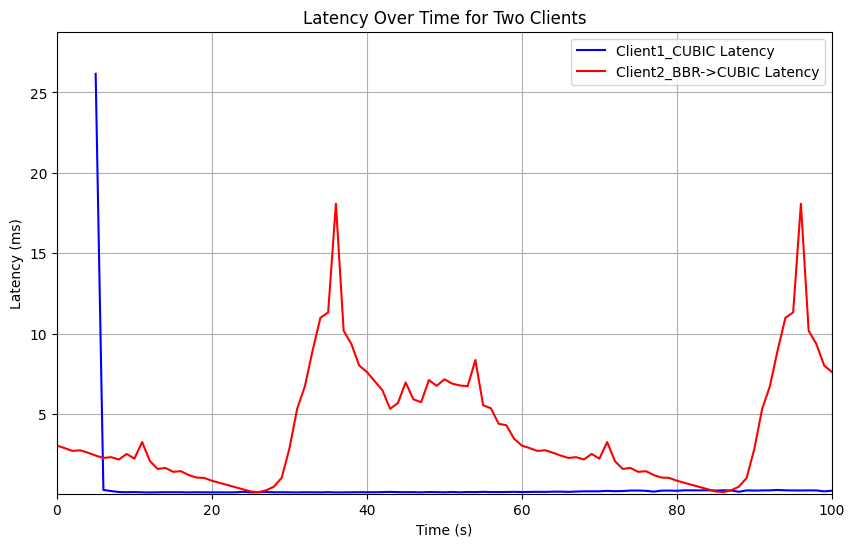

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('/home/sit-research/Downloads/combine results/client1_latency.csv')
client2_df = pd.read_csv('/home/sit-research/Downloads/combine results/client2_ latency_data.csv')

# Drop rows with NaN or Inf values in the 'Latency' column
client1_df = client1_df.dropna(subset=['Latency']).replace([np.inf, -np.inf], np.nan).dropna(subset=['Latency'])
client2_df = client2_df.dropna(subset=['Latency']).replace([np.inf, -np.inf], np.nan).dropna(subset=['Latency'])

# Convert latency to milliseconds for plotting
client1_df['Latency_ms'] = client1_df['Latency'] * 1000
client2_df['Latency_ms'] = client2_df['Latency'] * 1000

# Plotting
plt.figure(figsize=(10, 6))

# Plotting latency for Client 1
plt.plot(client1_df.index, client1_df['Latency_ms'], label='Client1_CUBIC Latency', color='blue')

# Plotting latency for Client 2
plt.plot(client2_df.index, client2_df['Latency_ms'], label='Client2_BBR->CUBIC Latency', color='red')

plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Time for Two Clients')
plt.legend()
plt.grid(True)

# Set x-axis limits from 0 to 100 seconds
plt.xlim(0, 100)

# Set y-axis limits starting from 0.05ms
plt.ylim(0.05, max(max(client1_df['Latency_ms']), max(client2_df['Latency_ms'])) * 1.1)  # Set y-axis upper limit dynamically

# Show plot
plt.savefig("./Graphs/"+"cubic-bbr-cubic latency.png", dpi=300,bbox_inches='tight')

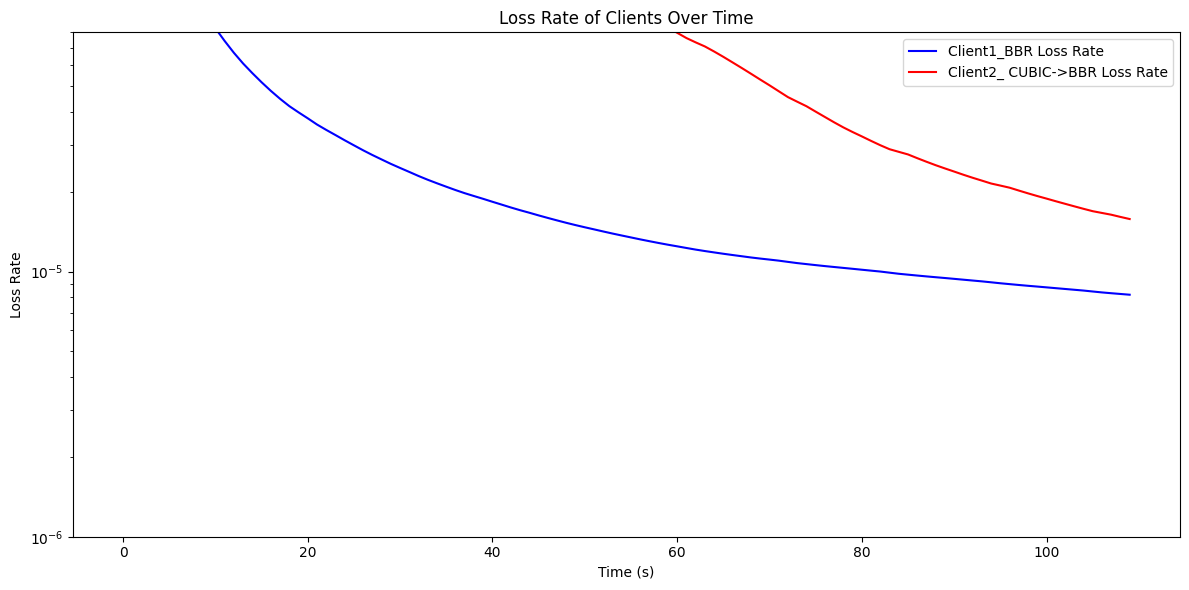

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both clients
client1_df = pd.read_csv('client1_databbr-cubic-cubic.csv')
client2_df = pd.read_csv('client2_data-bbr-cubic-cubic.csv')

# Convert 'Timestamp' to datetime for proper plotting
client1_df['Timestamp'] = pd.to_datetime(client1_df['Timestamp'])
client2_df['Timestamp'] = pd.to_datetime(client2_df['Timestamp'])

# Convert Timestamp to seconds relative to the minimum timestamp
client1_df['Time (s)'] = (client1_df['Timestamp'] - client1_df['Timestamp'].min()).dt.total_seconds()
client2_df['Time (s)'] = (client2_df['Timestamp'] - client2_df['Timestamp'].min()).dt.total_seconds()

# Plotting
plt.figure(figsize=(12, 6))

# Specify color for both clients
color1 = 'blue'
color2 = 'red'

# Plotting Client 1 data
plt.plot(client1_df['Time (s)'], client1_df['LossRate'], label='Client1_BBR Loss Rate', color=color1)

# Plotting Client 2 data
plt.plot(client2_df['Time (s)'], client2_df['LossRate'], label='Client2_ CUBIC->BBR Loss Rate', color=color2)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Loss Rate')
plt.title('Loss Rate of Clients Over Time')
plt.legend()

# Set y-axis limits starting from 0.000001 to the maximum value of 0.00008
plt.ylim(0.000001, 0.00008)

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Show plot
plt.savefig("./Graphs/"+"loss bbr-cubic-cubic.png", dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()
